In [2]:
import pandas as pd
import numpy  as np

from matplotlib import pyplot as plt
from pathlib    import Path

In [25]:
ROOT    = Path('/home/aroefer/rl_ws/src/bopt_gmm/scripts/data')
PATTERN_CFG = 'hatch_configs.csv'
PATTERN_INC = 'hatch_incumbents.csv'

dfs_cfg = [pd.read_csv(p) for p in ROOT.glob(PATTERN_CFG)]
dfs_inc = [pd.read_csv(p) for p in ROOT.glob(PATTERN_INC)]

In [26]:
dfs_cfg

[       mean_position_0_0  e_0_position|velocity_0  rot_1_position|velocity_2  \
 0               0.000000                      1.0                   0.254304   
 1               0.000000                      1.0                  -0.368239   
 2               0.000000                      1.0                   0.000000   
 3               0.000000                      1.0                  -0.334584   
 4               0.000000                      1.0                  -0.004788   
 ...                  ...                      ...                        ...   
 15995          -0.043241                      1.0                  -0.059913   
 15996          -0.178890                      1.0                  -0.179276   
 15997           0.028746                      1.0                   0.000000   
 15998           0.021553                      1.0                   0.053592   
 15999          -0.009702                      1.0                   0.015923   
 
        e_4_position|veloc

In [27]:
ANALOGOUS = np.array([['#0CE879', '#0CF23E', '#12DB00', '#70F20C', '#B8E80C'],
                      ['#E8A40C', '#F2940C', '#DB6300', '#F2520C', '#E82F0C'],
                      ['#3769FA', '#318BDE', '#42CEF5', '#31DED5', '#37FAB9'],
                      ['#DFFA17', '#DED114', '#F4D221', '#DEA814', '#FAA717'],
                      ['#FA4612', '#DE2010', '#F51D4F', '#DE10A7', '#DD12FA'],
                      ['#FA0AF5', '#A609DE', '#7C15F5', '#3209DE', '#0A1CFA'],
                      ['#670FFA', '#220DDE', '#1B3EF5', '#0D67DE', '#0FB2FA']])

DISTINCT = np.hstack([ANALOGOUS.T[2], ANALOGOUS.T[4], ANALOGOUS.T[0], ANALOGOUS.T[3], ANALOGOUS.T[1]]).flatten()

In [28]:
mega_values = np.stack([d.to_numpy() for d in dfs_cfg], -1)

In [29]:
non_data_indices = [x for x, c in enumerate(dfs_cfg[0].columns) if c not in {'accuracy', 'bopt_step'}]

BOPT_COLUMN_IDX = list(dfs_cfg[0].columns).index('bopt_step')
ACC_COLUMN_IDX  = list(dfs_cfg[0].columns).index('accuracy')

In [30]:
means = mega_values.mean(axis=2)[:, non_data_indices]
vars  = mega_values.std(axis=2)[:, non_data_indices]

In [31]:
def draw_var_plot(ax, x, y, var, color, label):
    ax.plot(x, y, label=label, c=color)
    if var is not None:
        ax.fill_between(x, y-var, y+var, alpha=0.3, facecolor=color)

In [32]:
import math

In [33]:
np.expand_dims(mega_values[:,2,0],-1).dot(np.expand_dims(mega_values[:,2,0], -1).T)

array([[ 0.06467056, -0.0936446 ,  0.        , ...,  0.        ,
         0.01362854,  0.00404932],
       [-0.0936446 ,  0.13559973,  0.        , ...,  0.        ,
        -0.01973447, -0.00586352],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01362854, -0.01973447,  0.        , ...,  0.        ,
         0.00287205,  0.00085335],
       [ 0.00404932, -0.00586352,  0.        , ...,  0.        ,
         0.00085335,  0.00025355]])

In [34]:
prefixes = {c.split('_')[0] for c in dfs_inc[0].columns[non_data_indices]}

prefix_limits = {p: [] for p in prefixes}

for c, rm, rv in zip(dfs_cfg[0].columns[non_data_indices], means.T, vars.T):
    prefix = c.split('_')[0]
    prefix_limits[prefix].extend(((rm - rv).min(), (rm + rv).max()))

prefix_limits = {p: (np.min(v), np.max(v)) for p, v in prefix_limits.items()}


In [35]:
prefix_limits

{'rot': (-0.3999967608122198, 0.3999954533280115),
 'e': (0.6000042731147556, 1.3999924311418237),
 'weight': (-0.1999843231412316, 0.1999883369690244),
 'mean': (-0.2999551796181376, 0.2999937928070211)}

/tmp/ipykernel_1514836/2510858365.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


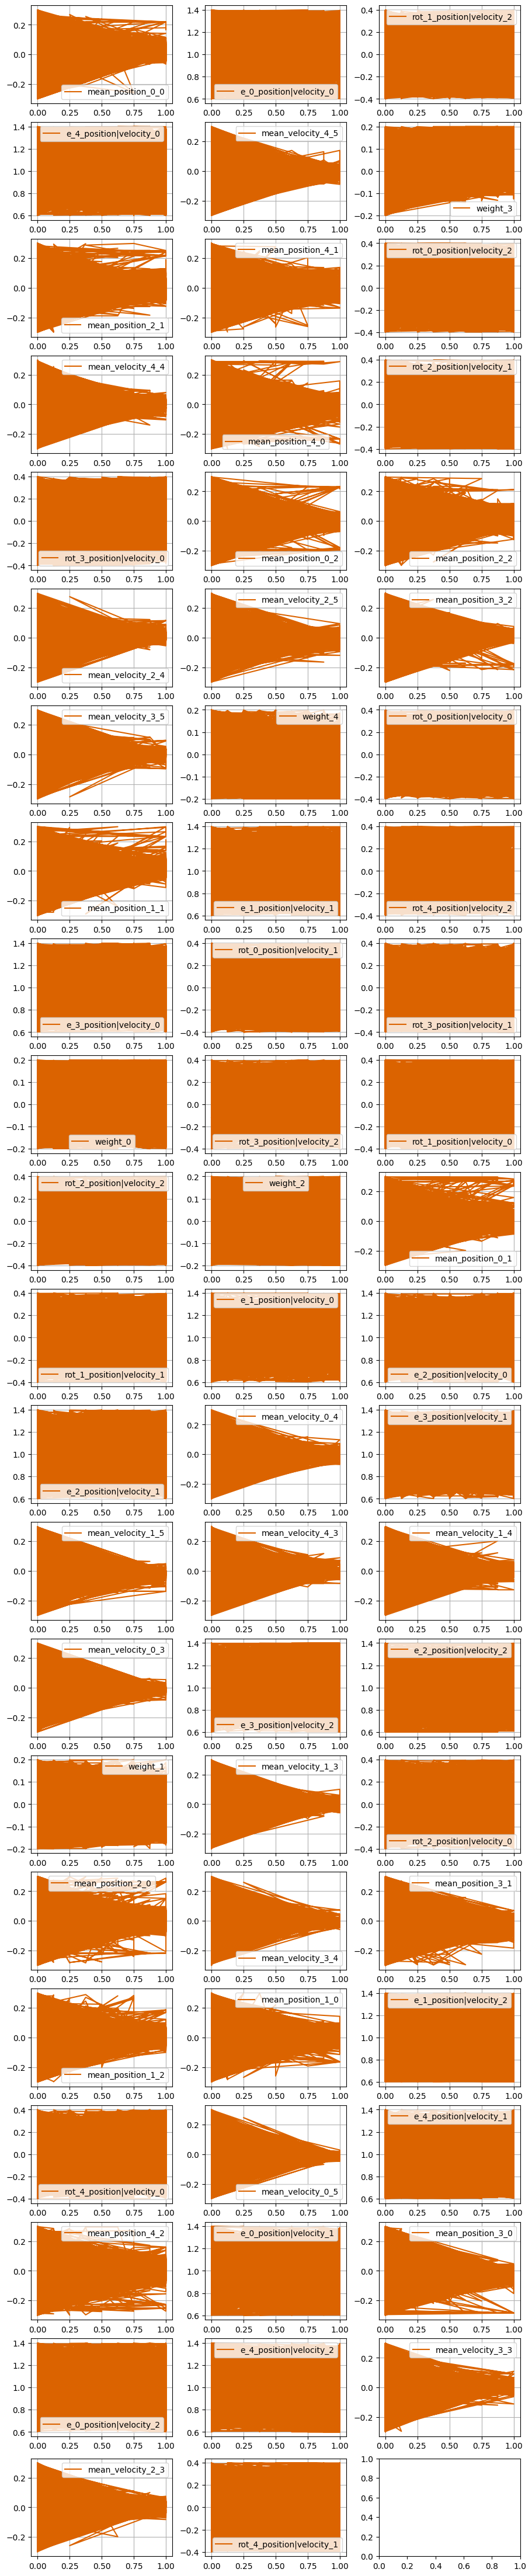

In [36]:
n_cols = 3
n_rows = int(math.ceil(len(means.T) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2), layout='constrained')

ticks = mega_values[:,ACC_COLUMN_IDX,0]

for x, (title, m, v, ax) in enumerate(zip(dfs_cfg[0].columns[non_data_indices], means.T, vars.T, axes.flatten())):
    ax.grid(True)

    draw_var_plot(ax, ticks, m, v, color='#DB6300', label=title)

    prefix = title.split('_')[0]
    y_min, y_max = prefix_limits[prefix]

    margin = (y_max - y_min) * 0.05

    ax.set_ylim(y_min - margin, y_max + margin)
    ax.legend()

fig.show()


In [69]:
dfs_inc[0]

,mean_position_2_2,mean_position_0_0,rot_0_force|velocity_1,mean_position_1_1,mean_position_1_2,weight_2,weight_1,mean_position_1_0,bopt_step,rot_0_force|velocity_2,...,mean_position_0_1,weight_0,accuracy,rot_1_force|velocity_2,mean_position_2_1,rot_1_force|velocity_0,mean_position_0_2,rot_2_force|velocity_0,rot_2_force|velocity_2,rot_2_force|velocity_1
0,-0.283274,0.012919,-0.062230,0.260554,-0.083626,-0.186370,0.021471,0.277068,1.0,-0.004632,...,-0.063890,-0.117758,0.00,0.024842,-0.156259,-0.089398,0.286181,0.089132,0.356357,0.371110
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,...,0.000000,0.000000,0.56,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.077640,-0.067145,-0.253597,-0.004905,-0.124195,0.020809,-0.145468,-0.018237,5.0,-0.073170,...,-0.266567,-0.135206,0.40,0.095089,0.146483,0.006519,0.067478,0.280864,0.043204,-0.003643
3,0.034811,0.000000,0.000000,-0.040493,-0.090809,0.000000,0.043555,0.000000,12.0,0.000000,...,0.000000,0.000000,0.98,-0.021865,0.000000,0.000000,0.000000,0.007188,0.000000,0.000000
4,-0.055594,-0.100328,-0.203507,0.254686,0.145432,0.198741,-0.114368,-0.108829,1.0,0.096290,...,-0.191207,-0.156202,0.00,-0.303758,-0.179086,0.034812,0.197309,-0.031756,0.370982,0.148009
5,0.045734,0.006988,0.135227,-0.096107,-0.095288,-0.013414,0.156735,0.014708,2.0,-0.182072,...,0.171891,0.002080,0.32,0.240293,0.098305,-0.039596,-0.008083,0.299205,-0.359361,-0.015450
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,...,0.000000,0.000000,0.58,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.008301,-0.042910,0.047038,0.045544,-0.008700,0.000000,-0.003649,0.000000,4.0,0.000000,...,0.000000,0.031177,0.52,0.045119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,-0.028166,-0.058785,0.051244,0.049782,0.000000,-0.020220,-0.007724,0.059707,33.0,-0.007560,...,0.062926,0.007666,0.88,0.000000,-0.044741,0.000000,-0.015723,0.000000,-0.035956,-0.005141
9,-0.073913,-0.002033,0.377221,0.134870,0.114191,-0.020570,-0.092173,0.007753,1.0,0.043970,...,0.206657,-0.064370,0.00,0.204611,0.223285,0.188416,0.084912,0.190486,-0.127148,0.196189


In [37]:
prefixes = {c.split('_')[0] for c in dfs_inc[0].columns[non_data_indices]}

prefix_list = [c.split('_')[0] for c in dfs_inc[0].columns]
prefix_idcs = {p: np.where(np.asarray(prefix_list) == p)[0] for p in prefixes}

mega_inc = np.vstack([d.to_numpy() for d in dfs_inc])

prefix_means = {p: mega_inc.T[idcs].mean() for p, idcs in prefix_idcs.items()}
prefix_max_activations = {p: (mega_inc[:,idcs] - prefix_means[p])[np.arange(mega_inc.shape[0]), np.argmax(np.abs(mega_inc.T[idcs] - prefix_means[p]), axis=0)] for p, idcs in prefix_idcs.items()}

prefix_limits = {p: [] for p in prefixes}

for c, r in zip(dfs_inc[0].columns[non_data_indices], mega_inc[:, non_data_indices].T):
    prefix = c.split('_')[0]
    prefix_limits[prefix].extend((r.min(), r.max()))

prefix_limits = {p: (np.min(v), np.max(v)) for p, v in prefix_limits.items()}


In [38]:
prefix_max_activations

{'rot': array([-0.39986507, -0.39630591, -0.00112381, ..., -0.37338161,
        -0.00112381, -0.07546509]),
 'e': array([-0.00121316, -0.00121316, -0.00121316, ..., -0.00121316,
        -0.00121316, -0.00121316]),
 'weight': array([-1.82144328e-01,  1.79466742e-01,  8.35807019e-05, ...,
        -1.88461452e-01,  8.35807019e-05, -2.58430212e-03]),
 'mean': array([-0.00041983, -0.00041983, -0.00041983, ..., -0.25108009,
        -0.00041983,  0.01988762])}

In [39]:
median_val = np.median(mega_inc, axis=0)

In [40]:
median_val

array([0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.62, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 1.  , 0.  , 3.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  ,
       0.  ])

/tmp/ipykernel_1514836/2388165923.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


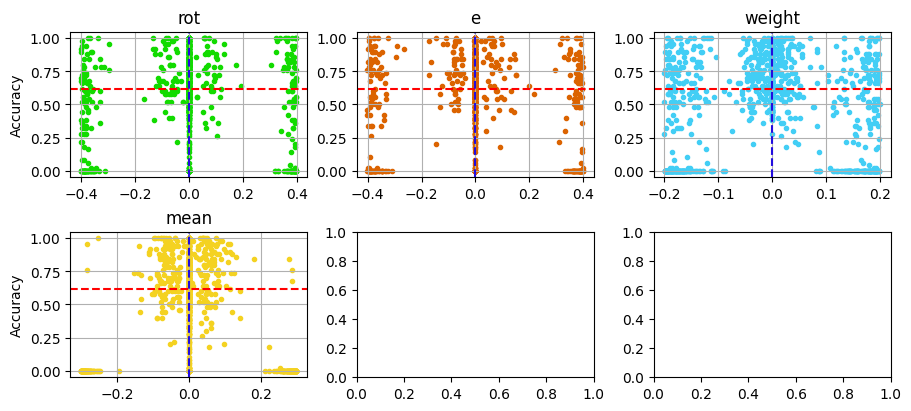

In [41]:
n_cols = 3
n_rows = int(math.ceil(len(prefix_max_activations) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2), layout='constrained')

for x, ((prefix, series), ax) in enumerate(zip(prefix_max_activations.items(), axes.flatten())):
    ax.set_title(prefix)
    if x % n_cols == 0:
        ax.set_ylabel('Accuracy')

    ax.scatter(series, mega_inc.T[ACC_COLUMN_IDX], c=DISTINCT[x], marker='.')

    x_min, x_max = prefix_limits[prefix]

    margin = (x_max - x_min) * 0.05

    ax.axhline(y=median_val[ACC_COLUMN_IDX], color='r', linestyle='--')
    ax.axvline(x=np.median(series), color=DISTINCT[-1], linestyle='--')

    # ax.set_xlim(x_min - margin, x_max + margin)
    ax.set_ylim(-0.05, 1.05)
    ax.grid(True)
    # ax.legend()

fig.show()

/tmp/ipykernel_1514836/2995367647.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


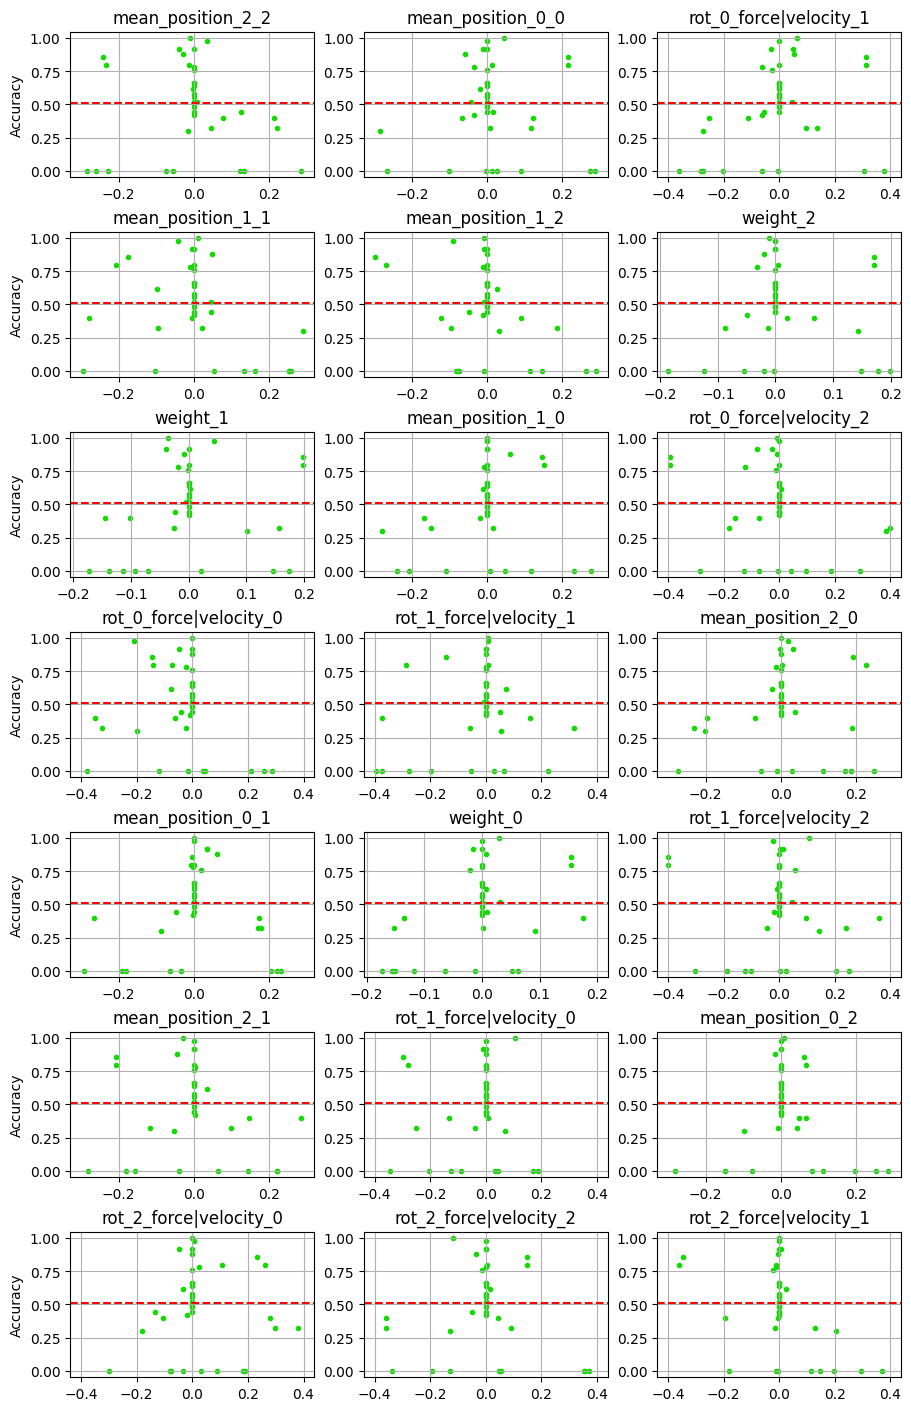

In [24]:
n_cols = 3
n_rows = int(math.ceil(len(means.T) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2), layout='constrained')

for x, (value, ax) in enumerate(zip(dfs_inc[0].columns[non_data_indices], axes.flatten())):
    ax.set_title(value)
    if x % n_cols == 0:
        ax.set_ylabel('Accuracy')

    for df, color in zip(dfs_inc, DISTINCT):
        coords = df[[value, 'accuracy']].to_numpy()
        ax.scatter(coords.T[0], coords.T[1], c=color, marker='.')
    
    prefix = value.split('_')[0]
    x_min, x_max = prefix_limits[prefix]

    margin = (x_max - x_min) * 0.05

    ax.axhline(y=median_val[ACC_COLUMN_IDX], color='r', linestyle='--')

    ax.set_xlim(x_min - margin, x_max + margin)
    ax.set_ylim(-0.05, 1.05)
    ax.grid(True)
    # ax.legend()

fig.show()